# References
## Hamm et al. 1987a, b
* Distribution and measurement of single-axon recurrent inhibitory post-synaptic potentials. Results here are used mostly for comparisons in a qualitatively manner.
* Simulations tryed to reproduce Figure 5 (first paper) and Figure 2 (second paper).
* The authors could obtain a proportion of motoneuron-motor axon that could be used to define the connectivity in the pool.

## Uchiyama et al. (2003a)
* Number of Renshaw cells associated with the medial gastrocnemius $\alpha$ motoneuron pool is arbitrarily assumed to be 300, but it is not too far away from what has been studied in the literature.
* Synaptic swellings are indications of the strength of an $\alpha$ motoneuron's synaptic inputs to other spinal neurons. The proportions used are those reported by Cullheim and Kellerth (1978), in which FF number is ca. 1.8 the FR number and ca. 2.2 the S number.

# Parameters adjusted
* Supposedly, the probability of connections and motoneuron conductances on Renshaw cells are the only parameters to be adjusted.

# Considerations
* Stimulation of motor axons would require modifications on the code and would be a time consuming task. In order to simulate the experiments presented, stimulation were delivered to the soma of the motoneuron and this was considered to have the same effect as a single motor axon stimulation.
* Proportions cited in the work of Hamm and colleages is not explored in the simulations yet because of the lack of informations regarding distances.
* SOL is used here because of an error. It should be MG on the pool creation and the appropriate value for the pool boundary (according to McCurdy and Hamm (1994a)).
* For now, I am using a Renshaw cell density of 300 cells per 7 mm. I could change this density later to something similar to what was described in Cisi and Kohn (2008). The value of 7 mm used here is the length of the medial gastrocnemius neuronal column in the cat (it was 10 mm in Cisi work).

In [1]:
import sys
sys.path.append('Parametrizations/Population')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.interpolate import UnivariateSpline

from simulator import simulator

In [2]:
nS = 75
nFR = 75
nFF = 150
nRC = 300
nMN = nS+nFR+nFF
MNi = (nMN)/2
params = 'final'

MNRCdecay = 1/6.0
RCMNdecay = 3.5/3
MNposition = 7
RCposition = 7

gmaxFF = 0.3

MNsignal, RCsignal, t, positions = simulator(nS, nFR, nFF, nRC, MNi, params, MNRCdecay, RCMNdecay, MNposition, RCposition, gmaxFF)

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 37943 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built


<IPython.core.display.Javascript object>


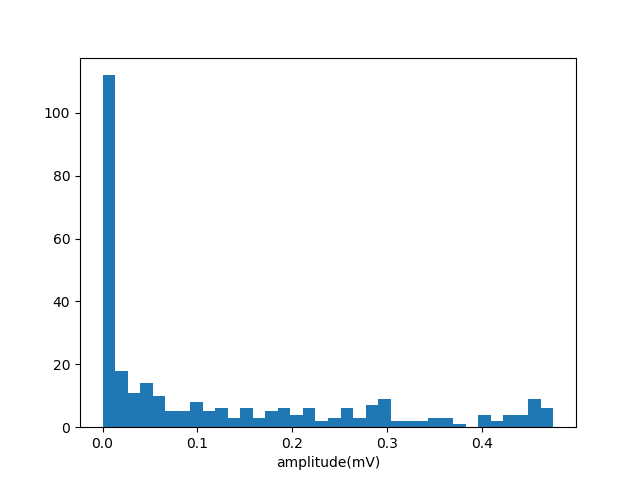

In [3]:
peaks = [abs(min(MNsignal[y,])) for y in range(MNsignal.shape[0]) if y != MNi]
bins = np.linspace(min(peaks),max(peaks),len(peaks)/8)
plt.figure()
plt.hist(peaks, bins=bins)
plt.xlabel('amplitude(mV)')
plt.show()

<IPython.core.display.Javascript object>


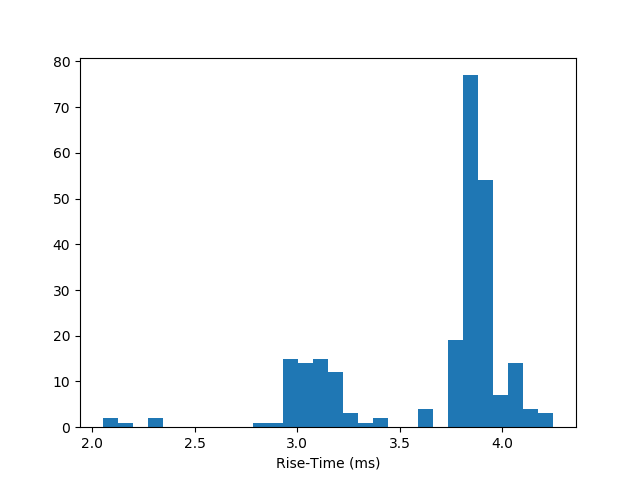

In [4]:
peaks = [min(MNsignal[y,]) for y in range(MNsignal.shape[0])]
rise_time = []

for i in range(MNsignal.shape[0]):
    if i==MNi:
        continue
    for j in range(MNsignal.shape[1]):
        if MNsignal[i,j]!=0.0:
            ti = j
            tf = np.where(MNsignal[i,]==peaks[i])[0][0]
            rise_time.append(t[tf]-t[ti])
            break
            
bins = np.linspace(min(rise_time),max(rise_time),len(rise_time)/8)
plt.figure()
plt.hist(rise_time, bins=bins)
plt.xlabel('Rise-Time (ms)')
plt.show()

<IPython.core.display.Javascript object>


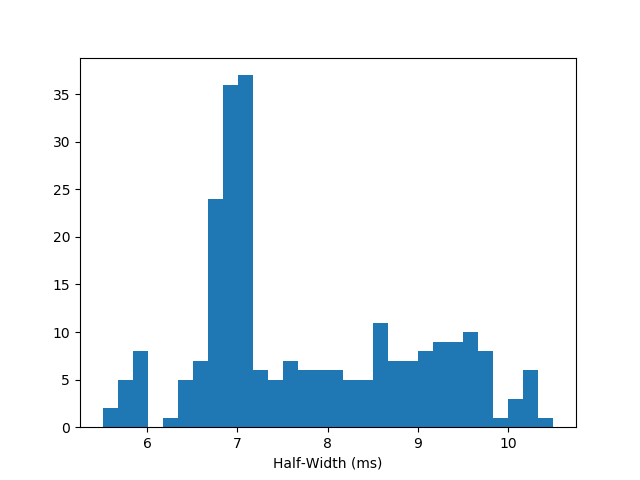

In [5]:
half_width = []

for i in range(MNsignal.shape[0]):
    if i == MNi:
        continue
    if min(MNsignal[i,]) == 0:
        continue
    spline = UnivariateSpline(t, MNsignal[i,] - min(MNsignal[i,])/2, s=0)
    roots = spline.roots()
    if len(roots)>2:
        continue
    r1, r2 = roots
    half_width.append(r2-r1)
    
bins = np.linspace(min(half_width),max(half_width),len(half_width)/8)
plt.figure()
plt.hist(half_width, bins=bins)
plt.xlabel('Half-Width (ms)')
plt.show()

<IPython.core.display.Javascript object>


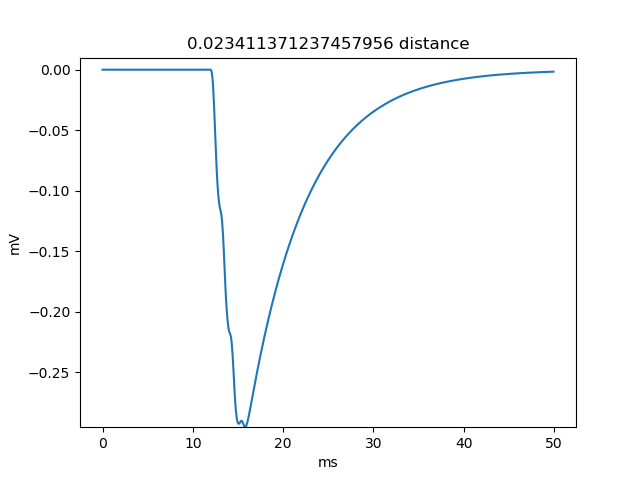

<IPython.core.display.Javascript object>


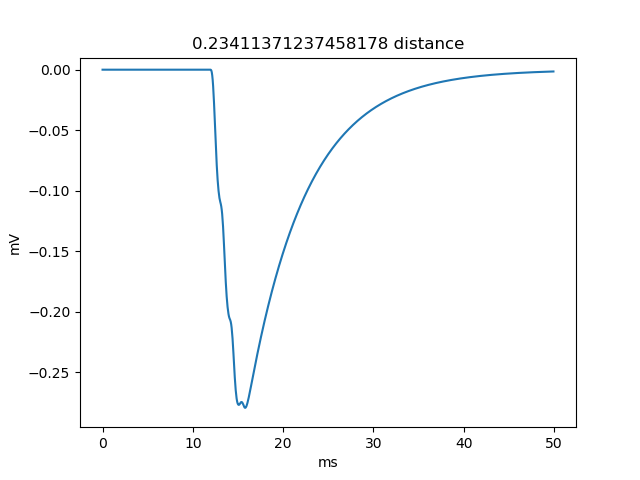

<IPython.core.display.Javascript object>


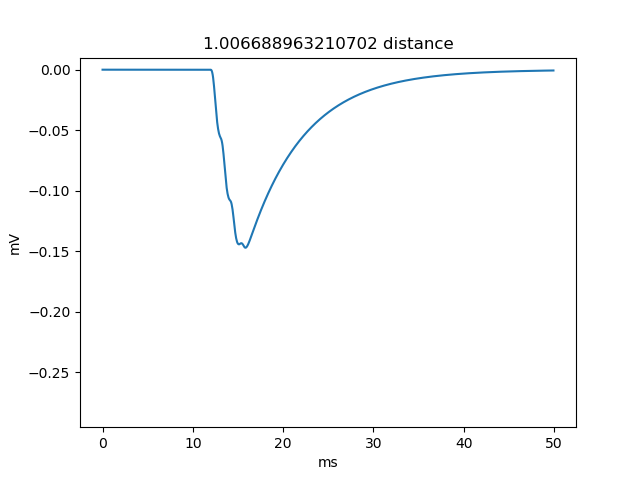

<IPython.core.display.Javascript object>


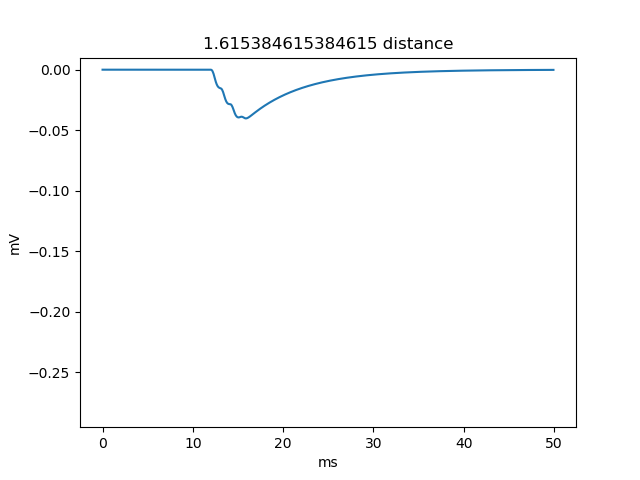

In [6]:
# According to 300 MNs divided along a 7 mm column
selectedMNs = [MNi+1, MNi+10, MNi+43, MNi+69]
y = min(MNsignal[MNi+1,])

for i in selectedMNs:
    plt.figure()
    plt.ylim(ymin=y)
    plt.ylim(ymax=0.01)
    plt.plot(t, MNsignal[i,])
    plt.title(str(positions[i] - positions[MNi])+' distance')
    plt.xlabel('ms')
    plt.ylabel('mV')
    plt.show()